In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df = df.drop('CustomerId', axis = 'columns')

In [5]:
df = df.drop('Surname', axis = 'columns')

In [6]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5058,714,France,Male,37,9,148466.93,2,0,1,151280.96,0
9429,651,France,Female,32,8,144581.96,1,1,1,87609.50,0
1385,716,France,Female,35,8,112808.18,1,0,1,17848.30,0
1027,737,Germany,Male,35,0,133377.80,1,0,1,64050.19,0
9821,652,Spain,Male,28,8,156823.70,2,1,0,198251.52,0


In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
tenure_exited_yes = df[df.Exited == 1].Tenure
tenure_exited_no = df[df.Exited == 0].Tenure
tenure_exited_yes

0       2
2       8
5       8
7       4
16      1
       ..
9981    3
9982    7
9991    4
9997    7
9998    3
Name: Tenure, Length: 2037, dtype: int64

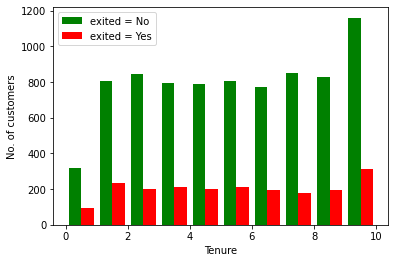

In [9]:
plt.xlabel("Tenure")
plt.ylabel("No. of customers")
plt.hist([tenure_exited_no, tenure_exited_yes], color = ['green', 'red'], label=['exited = No', 'exited = Yes'])
plt.legend()

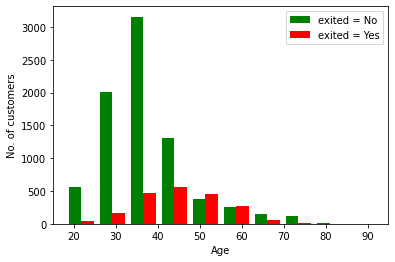

In [10]:
age_exited_yes = df[df.Exited == 1].Age
age_exited_no = df[df.Exited == 0].Age
plt.xlabel("Age")
plt.ylabel("No. of customers")
plt.hist([age_exited_no, age_exited_yes], color = ['green', 'red'], label=['exited = No', 'exited = Yes'])
plt.legend()


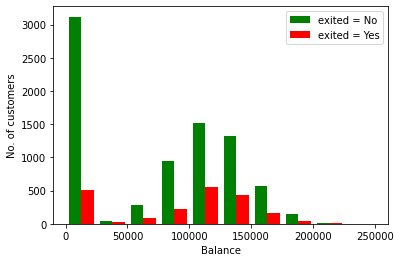

In [11]:
balance_exited_yes = df[df.Exited == 1].Balance
balance_exited_no = df[df.Exited == 0].Balance
plt.xlabel("Balance")
plt.ylabel("No. of customers")
plt.hist([balance_exited_no, balance_exited_yes], color = ['green', 'red'], label=['exited = No', 'exited = Yes'])
plt.legend()


In [12]:
credit_exited_yes = df[df.Exited == 1].CreditScore
credit_exited_no = df[df.Exited == 0].CreditScore
credit_exited_no



1       608
3       699
4       850
6       822
8       501
       ... 
9993    644
9994    800
9995    771
9996    516
9999    792
Name: CreditScore, Length: 7963, dtype: int64

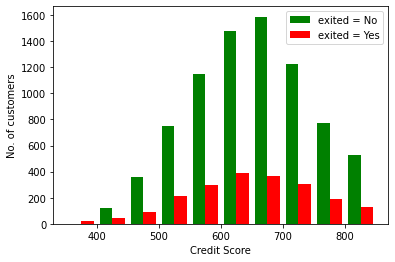

In [13]:
plt.xlabel("Credit Score")
plt.ylabel("No. of customers")
plt.hist([credit_exited_no, credit_exited_yes], color = ['green', 'red'], label=['exited = No', 'exited = Yes'])
plt.legend()

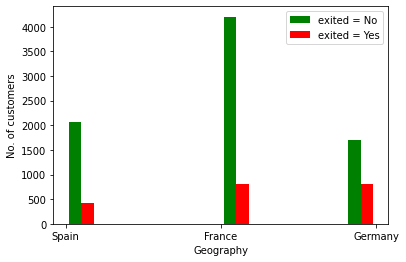

In [14]:
geography_exited_yes = df[df.Exited == 1].Geography
geography_exited_no = df[df.Exited == 0].Geography
plt.xlabel("Geography")
plt.ylabel("No. of customers")
plt.hist([geography_exited_no, geography_exited_yes], color = ['green', 'red'], label=['exited = No', 'exited = Yes'])
plt.legend()


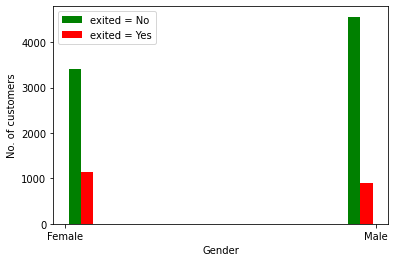

In [15]:
gender_exited_yes = df[df.Exited == 1].Gender
gender_exited_no = df[df.Exited == 0].Gender
plt.xlabel("Gender")
plt.ylabel("No. of customers")
plt.hist([gender_exited_no, gender_exited_yes], color = ['green', 'red'], label=['exited = No', 'exited = Yes'])
plt.legend()


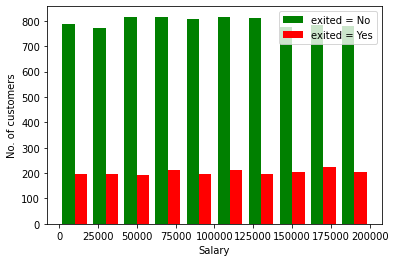

In [16]:
salary_exited_yes = df[df.Exited == 1].EstimatedSalary
salary_exited_no = df[df.Exited == 0].EstimatedSalary
plt.xlabel("Salary")
plt.ylabel("No. of customers")
plt.hist([salary_exited_no, salary_exited_yes], color = ['green', 'red'], label=['exited = No', 'exited = Yes'])
plt.legend()


In [17]:
df.replace({'Male': 1, 'Female': 0},inplace =True)

In [18]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9746,490,Germany,0,41,0,139659.04,1,1,1,176254.12,0
3208,607,Germany,1,36,8,143421.74,1,1,0,97879.02,0
2163,605,France,1,35,6,0.00,2,1,1,45206.57,0
1090,539,Germany,0,34,4,91622.42,1,1,1,136603.42,0
8938,693,Spain,1,47,8,107604.66,1,1,1,80149.27,0


In [19]:
df1 = pd.get_dummies(data = df, columns = ['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [20]:
col_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[col_to_scale] = scaler.fit_transform(df1[col_to_scale])

In [21]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
4691,0.544,1,0.256757,0.4,0.000000,0.333333,1,0,0.022242,0,0,0,1
2149,0.972,1,0.527027,0.4,0.403539,0.000000,1,0,0.185668,1,0,0,1
534,0.400,0,0.297297,0.7,0.455782,0.000000,1,0,0.270063,0,1,0,0
3433,0.474,0,0.256757,0.6,0.416161,0.000000,1,0,0.960164,0,0,1,0
9294,0.726,1,0.243243,0.8,0.533640,0.000000,1,1,0.716339,0,1,0,0
8729,0.592,1,0.405405,0.8,0.673673,0.333333,1,1,0.878314,0,0,1,0
6426,0.786,1,0.364865,0.7,0.627076,0.000000,1,0,0.627124,0,0,0,1
3254,0.404,1,0.432432,0.4,0.482967,0.000000,1,0,0.587524,1,0,1,0
9401,0.710,0,0.378378,0.4,0.460418,0.000000,0,0,0.382703,1,0,1,0
7252,0.434,1,0.297297,0.7,0.487310,0.000000,1,0,0.692772,0,0,1,0


In [22]:
X = df1.drop('Exited', axis = 'columns')
Y = df1['Exited']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 5)

In [24]:
model = keras.Sequential([keras.layers.Dense(20, input_shape=(12,), activation = 'relu'),
                          keras.layers.Dense(1, activation = 'sigmoid'),
                         ])


model.compile(optimizer = 'adam',
             loss = 'mean_squared_error',
             metrics = ['accuracy'])

model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
250/250 [==============================] - 6s 7ms/step - loss: 0.1638 - accuracy: 0.7860
Epoch 2/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1493 - accuracy: 0.7983
Epoch 3/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1452 - accuracy: 0.8040
Epoch 4/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1418 - accuracy: 0.8073
Epoch 5/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1389 - accuracy: 0.8126
Epoch 6/100
250/250 [==============================] - 2s 6ms/step - loss: 0.1368 - accuracy: 0.8150
Epoch 7/100
250/250 [==============================] - 2s 6ms/step - loss: 0.1347 - accuracy: 0.8183
Epoch 8/100
250/250 [==============================] - 2s 6ms/step - loss: 0.1330 - accuracy: 0.8190
Epoch 9/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1308 - accuracy: 0.8213
Epoch 10/100
250/250 [==============================] - 2s 7ms/step - loss: 0.1290 - accura

250/250 [==============================] - 1s 6ms/step - loss: 0.1017 - accuracy: 0.8650
Epoch 82/100
250/250 [==============================] - 1s 6ms/step - loss: 0.1018 - accuracy: 0.8625
Epoch 83/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1018 - accuracy: 0.8634
Epoch 84/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1017 - accuracy: 0.8648
Epoch 85/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1017 - accuracy: 0.8651
Epoch 86/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1017 - accuracy: 0.8639
Epoch 87/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1015 - accuracy: 0.8652
Epoch 88/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1016 - accuracy: 0.8654
Epoch 89/100
250/250 [==============================] - 1s 5ms/step - loss: 0.1013 - accuracy: 0.8660
Epoch 90/100
250/250 [==============================] - 1s 6ms/step - loss: 0.1013 - accuracy: 

In [32]:
model.evaluate(X_test, Y_test)

63/63 [==============================] - 0s 7ms/step - loss: 0.1089 - accuracy: 0.8510


[0.1089058518409729, 0.8510000109672546]

In [33]:
yp = model.predict(X_test)
yp[:100]

array([[0.05503627],
       [0.08958638],
       [0.07900487],
       [0.07436389],
       [0.0805361 ],
       [0.11722503],
       [0.01942836],
       [0.390349  ],
       [0.0182497 ],
       [0.9494832 ],
       [0.0291584 ],
       [0.04621696],
       [0.01795242],
       [0.68339205],
       [0.03658224],
       [0.04602353],
       [0.5440206 ],
       [0.1531081 ],
       [0.049528  ],
       [0.16034558],
       [0.01358465],
       [0.08677825],
       [0.01211936],
       [0.07383154],
       [0.38497645],
       [0.07956879],
       [0.5818217 ],
       [0.2782031 ],
       [0.0074918 ],
       [0.05194543],
       [0.23225865],
       [0.1859352 ],
       [0.21143143],
       [0.8760621 ],
       [0.09408019],
       [0.0749309 ],
       [0.0029799 ],
       [0.03752731],
       [0.09523494],
       [0.08762636],
       [0.36328655],
       [0.10431132],
       [0.08152786],
       [0.01418948],
       [0.39473408],
       [0.10040738],
       [0.11698448],
       [0.034

In [34]:
Y_test[:100]

7054    0
442     0
3954    0
2288    0
3196    0
       ..
3370    1
6166    0
4653    1
5759    0
425     0
Name: Exited, Length: 100, dtype: int64

In [35]:
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:100]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1595
           1       0.68      0.49      0.57       405

    accuracy                           0.85      2000
   macro avg       0.78      0.72      0.74      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

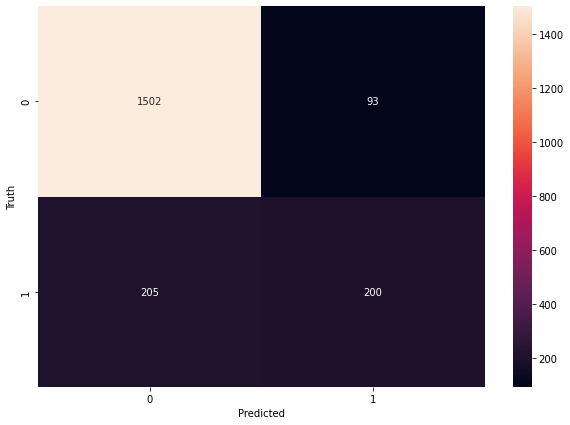

In [31]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels = Y_test, predictions = y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
